**XOR GATE**

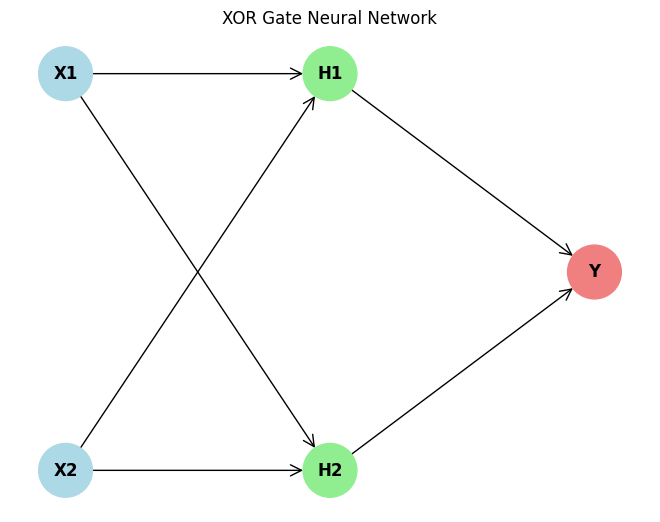

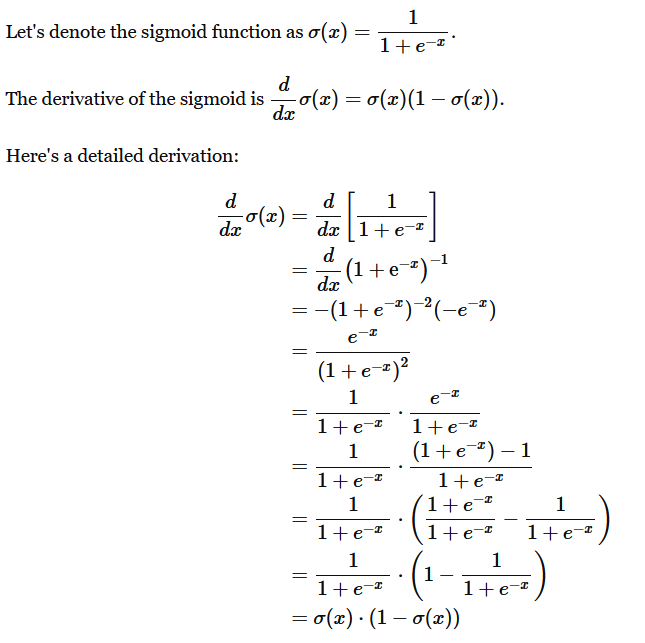

In [ ]:
!pip install numpy matplotlib

Initial Values are:
Weights Input-Hidden:
[[0.37454012 0.95071431]
 [0.73199394 0.59865848]]
Weights Hidden-Output:
[[0.15601864]
 [0.15599452]]
Bias Hidden:
[0.05808361 0.86617615]
Bias Output:
[0.60111501]

Final Predictions:
Input: [0 0], Predicted Output: 0.0607
Input: [0 1], Predicted Output: 0.9442
Input: [1 0], Predicted Output: 0.9441
Input: [1 1], Predicted Output: 0.0601
XOR GATE
Input: [0 0], Predicted Output: [0.]
Input: [0 1], Predicted Output: [1.]
Input: [1 0], Predicted Output: [1.]
Input: [1 1], Predicted Output: [0.]


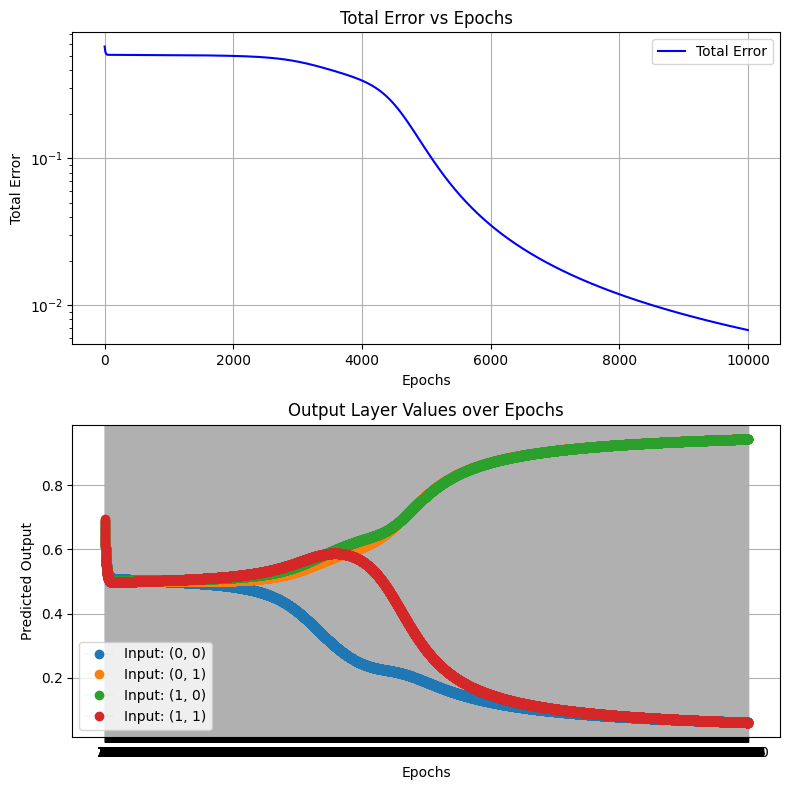

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])

np.random.seed(42)

hidden_layer_size = 2
input_layer_size = inputs.shape[1]
output_layer_size = outputs.shape[1]

weights_input_hidden = np.random.rand(input_layer_size, hidden_layer_size)
weights_hidden_output = np.random.rand(hidden_layer_size, output_layer_size)
bias_hidden = np.random.rand(hidden_layer_size)
bias_output = np.random.rand(output_layer_size)

learning_rate = 0.1
epochs = 10000
error_threshold = 0.00001

error_list = []

output_history = {tuple(inputs[i]): [] for i in range(len(inputs))}

print("Initial Values are:")
print(f"Weights Input-Hidden:\n{weights_input_hidden}")
print(f"Weights Hidden-Output:\n{weights_hidden_output}")
print(f"Bias Hidden:\n{bias_hidden}")
print(f"Bias Output:\n{bias_output}")

for epoch in range(epochs):
    total_error = 0
    for i in range(len(inputs)):
        input_layer = inputs[i]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = sigmoid(output_layer_input)

        target_output = outputs[i]
        error = target_output - predicted_output
        total_error += (1 / 2) * np.sum(error ** 2)

        d_predicted_output = error * sigmoid_derivative(predicted_output)
        error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        weights_hidden_output += hidden_layer_output.reshape(-1, 1).dot(
            d_predicted_output.reshape(1, -1)) * learning_rate
        weights_input_hidden += input_layer.reshape(-1, 1).dot(d_hidden_layer.reshape(1, -1)) * learning_rate

        bias_output += d_predicted_output * learning_rate
        bias_hidden += d_hidden_layer * learning_rate

    error_list.append(total_error)

    for j in range(len(inputs)):
        input_layer = inputs[j]
        hidden_layer_input = np.dot(input_layer, weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = sigmoid(output_layer_input)

        output_history[tuple(input_layer)].append(predicted_output.flatten()[0])


    if total_error < error_threshold:
        break

print("\nFinal Predictions:")
for i in range(len(inputs)):
    input_layer = inputs[i]
    hidden_layer_input = np.dot(input_layer, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    print(f"Input: {inputs[i]}, Predicted Output: {predicted_output.flatten()[0]:.4f}")
print("XOR GATE")
for i in range(len(inputs)):
    input_layer = inputs[i]
    hidden_layer_input = np.dot(input_layer, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    print(f"Input: {inputs[i]}, Predicted Output: {predicted_output.round()}")


plt.figure(figsize=(8,8))

plt.subplot(2, 1, 1)
plt.plot(error_list, label='Total Error', color='blue')
plt.title('Total Error vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.yscale('log')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
for idx, (input_tuple, outputs) in enumerate(output_history.items()):
    plt.plot(outputs, label=f'Input: {input_tuple}', marker='o', linewidth=0.05)

plt.title('Output Layer Values over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Predicted Output')
plt.xticks(ticks=np.arange(len(error_list)), labels=np.arange(1, len(error_list) + 1))
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
